# Example for `web_plot_digitiser.py`

Case study: Let's compare the spin curves of two molecular weights of ebeam resist at different percentage diluations.
The spin curves are available below, but as static images that are hard to read

[950K Datasheet][http://www.emresist.com/wp-content/uploads/2019/02/EM-Resist-PMMA-950K-Spin-curves.pdf]
[495K Datasheet][http://www.emresist.com/wp-content/uploads/2019/01/EM-Resist-PMMA-495K-Spin-curves.pdf]

I found the following online software that works really well for extracting data from these kinds of images;

[WebPlotDigitizer][https://automeris.io/WebPlotDigitizer/]

Unfortunately the output file in excel is not in great format for plotting with the tools I like to use (pandas/plotly)
The function described in `web_plot_digitiser.py` parses the excel output and puts into a nicely formatted dataframe. 




In [12]:
from RLtools.data_processing.web_plot_digitizer.web_plot_digitizer import read_wpd_outputs
from pathlib import Path
import pandas as pd
import plotly.express as px

examplefiles = Path('./RLtools/data_processing/web_plot_digitizer').rglob('*csv')

#I know these example files are for 495 and 950K
#read both into dfs, then concatenate together
output=[]
for f, mwt in zip(examplefiles, ['495K','950K']):
    output.append(read_wpd_outputs(f, mwt, 'Spin speed (rpm)','Film Thickness (nm)'))

df = pd.concat(output,axis=0)

#the output is in a good format for interfacing with plotly express
f=px.scatter(df, x='Spin speed (rpm)', y='Film Thickness (nm)', color='trace', facet_col='dataset')
f

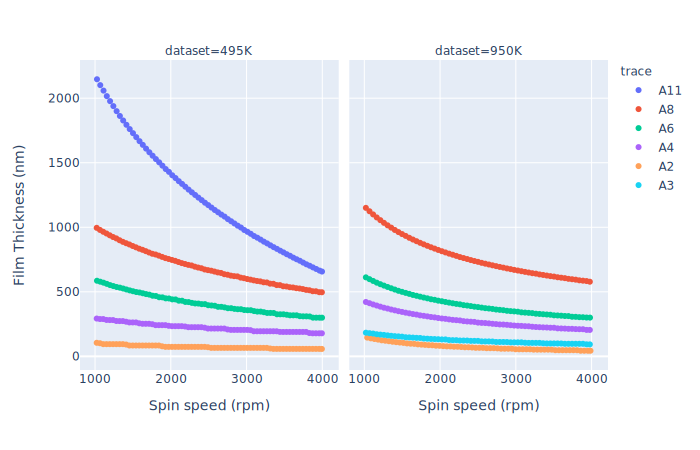

In [14]:
#svg copy for github
f.show('svg')